In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from skorch import NeuralNetRegressor

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import joblib

sns.set(style='whitegrid')

In [3]:
df1 = pd.read_csv('Datasets/direct1.csv')
df2 = pd.read_csv('Datasets/direct2.csv')
df3 = pd.read_csv('Datasets/indirect1.csv')
df4 = pd.read_csv('Datasets/indirect2.csv')
df4 = df4.rename(columns={'Pore radius [nm]': 'Pore diameter [nm]'})
print("First few rows of the dataset:")
df1.head()

First few rows of the dataset:


,Reference,Rock,P’[MPa],Permeability [nD],Porosity [%],Breakthrough pressure [MPa]
0,Amann-Hildenbrand et al. 2013,Opalinus Clay,25.0,6.9,11.6,4.1
1,Amann-Hildenbrand et al. 2013,Opalinus Clay,25.0,2.0,13.0,17.5
2,Amann-Hildenbrand et al. 2013,Opalinus Clay,25.0,2.5,13.0,14.0
3,Boulin et al. 2013,Ketzin Claystone,7.0,31.8,15.0,10.4
4,Boulin et al. 2013,Ketzin Claystone,25.0,15.6,15.0,13.0


In [4]:
df2.head()

,Reference,Rock,P’[MPa],Permeability [nD],Porosity [%],SSA [m2g-1],Pore diameter [nm],Clay content [%],Breakthrough pressure [MPa]
0,Amann-Hildenbrand 2013,Opalinus Clay,25.0,6.9,11.6,39.0,14.0,60.0,4.1
1,Amann-Hildenbrand et al. 2015,Opalinus Clay,25.0,2.0,13.0,NaN,10.0,80.0,17.5
2,Amann-Hildenbrand et al. 2015,Opalinus Clay,25.0,2.5,13.0,NaN,10.0,80.0,14.0
3,Hildenbrand et al. 2004,Boom Clay,20.0,557.0,24.4,20.1,170.0,3.0,5.8
4,Hildenbrand et al. 2004,Boom Clay,20.0,24.3,23.5,23.6,55.0,40.0,6.0


In [5]:
df3.head()

,Number of data points,Reference,Rock,Entry fluid,P’[MPa],Permeability [nD],Porosity [%],Breakthrough pressure [MPa]
1,Amann-Hildenbrand,2013,Shale,He,9,0.74,4.3,3.6
2,Amann-Hildenbrand,2013,Shale,He,14,0.87,4.3,4.1
3,Amann-Hildenbrand,2013,Shale,Hg,12,0.27,4.5,4.2
4,Amann-Hildenbrand,2013,Shale,Hg,8,1.52,9.1,3.8
5,Amann-Hildenbrand,2013,Shale,Hg,9,4.05,8.7,4.7


In [26]:
df4 = df4.rename(columns={'Pore radius [nm]': 'Pore diameter [nm]'})
df4.head()

,Number of data points,Reference,Rock,Entry fluid,P’[MPa],Permeability [nD],Porosity [%],SSA [m2g-1],Pore diameter [nm],Clay content [%],Breakthrough pressure [MPa]
1,Amann-Hildenbrand,2013,Shale,He,9,0.74,4.3,7.7,7.0,34.0,3.6
2,Amann-Hildenbrand,2013,Shale,Hg,12,0.27,4.5,23.3,4.0,38.0,4.2
3,Amann-Hildenbrand,2013,Shale,Hg,9,4.05,8.7,25.9,5.0,39.0,4.7
4,Amann-Hildenbrand,2013,Shale,Hg,20,24.26,8.7,22.5,8.0,41.0,2.7
5,Amann-Hildenbrand,2013,Shale,Hg,26,14.52,5.0,12.9,7.0,40.0,3.2


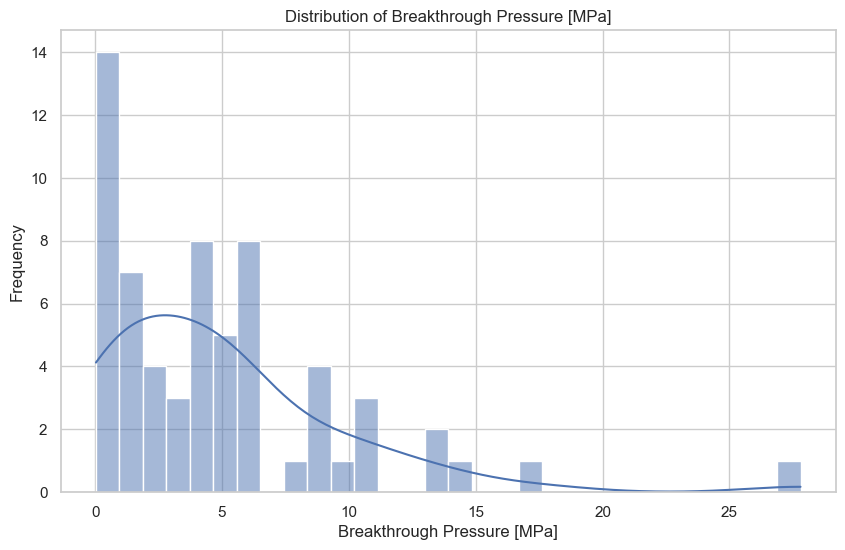

In [9]:
# Visualize the distribution of the target variable: Direct - 2 Variables
plt.figure(figsize=(10, 6))
sns.histplot(df1['Breakthrough pressure [MPa]'], bins=30, kde=True)
plt.title('Distribution of Breakthrough Pressure [MPa]')
plt.xlabel('Breakthrough Pressure [MPa]')
plt.ylabel('Frequency')
plt.show()

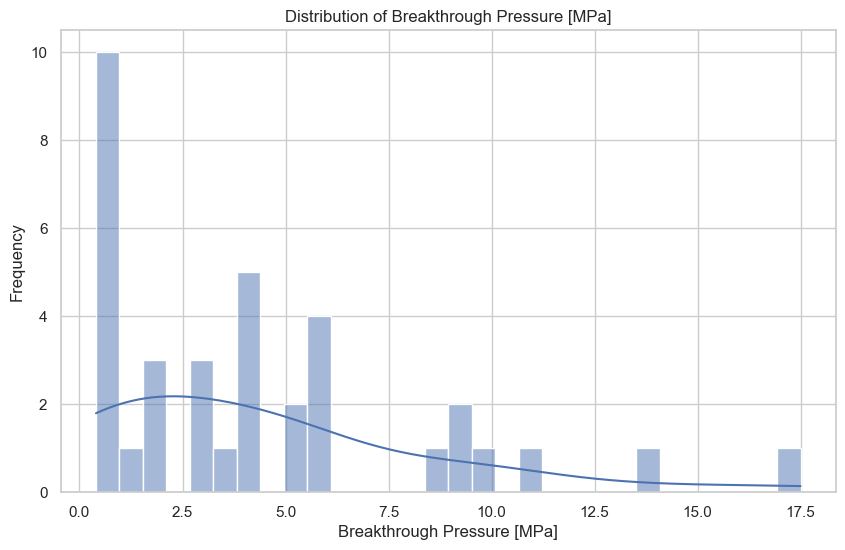

In [10]:
# Visualize the distribution of the target variable: Direct - 5 Variables
plt.figure(figsize=(10, 6))
sns.histplot(df2['Breakthrough pressure [MPa]'], bins=30, kde=True)
plt.title('Distribution of Breakthrough Pressure [MPa]')
plt.xlabel('Breakthrough Pressure [MPa]')
plt.ylabel('Frequency')
plt.show()

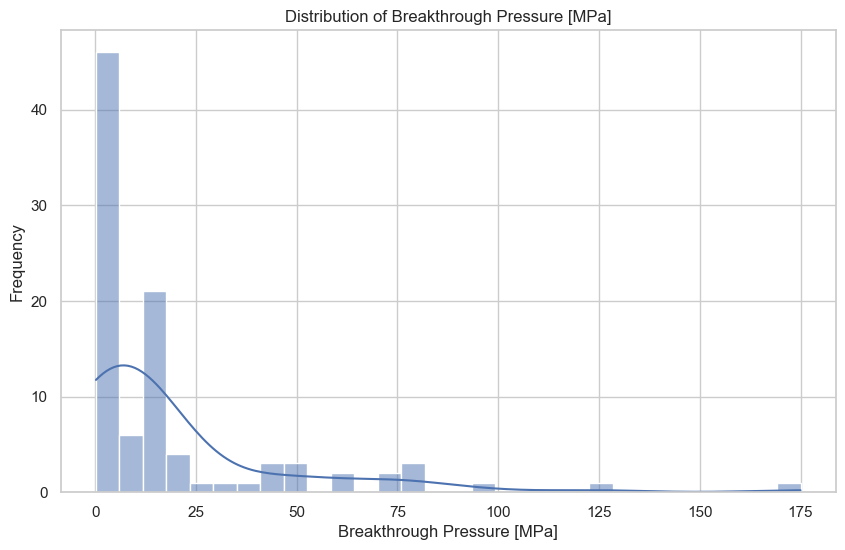

In [11]:
# Visualize the distribution of the target variable: Indirect - 2 Variables
plt.figure(figsize=(10, 6))
sns.histplot(df3['Breakthrough pressure [MPa]'], bins=30, kde=True)
plt.title('Distribution of Breakthrough Pressure [MPa]')
plt.xlabel('Breakthrough Pressure [MPa]')
plt.ylabel('Frequency')
plt.show()

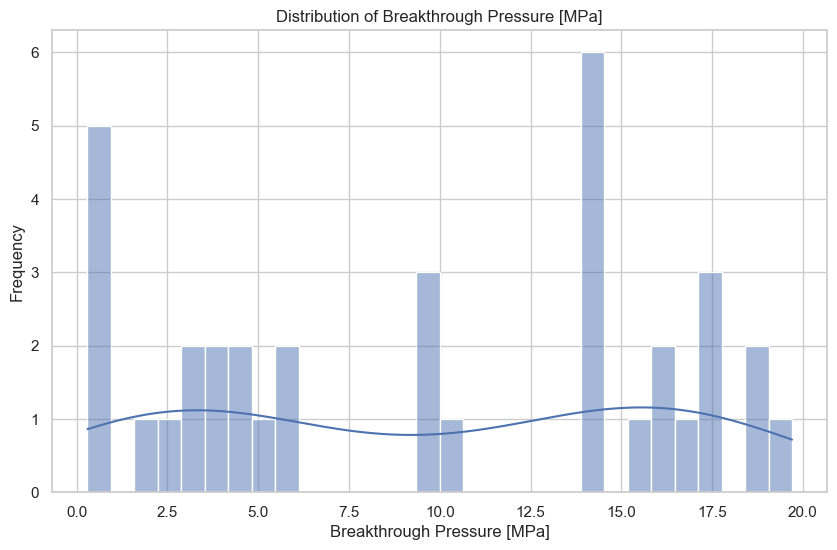

In [12]:
# Visualize the distribution of the target variable: Indirect - 5 Variables
plt.figure(figsize=(10, 6))
sns.histplot(df4['Breakthrough pressure [MPa]'], bins=30, kde=True)
plt.title('Distribution of Breakthrough Pressure [MPa]')
plt.xlabel('Breakthrough Pressure [MPa]')
plt.ylabel('Frequency')
plt.show()

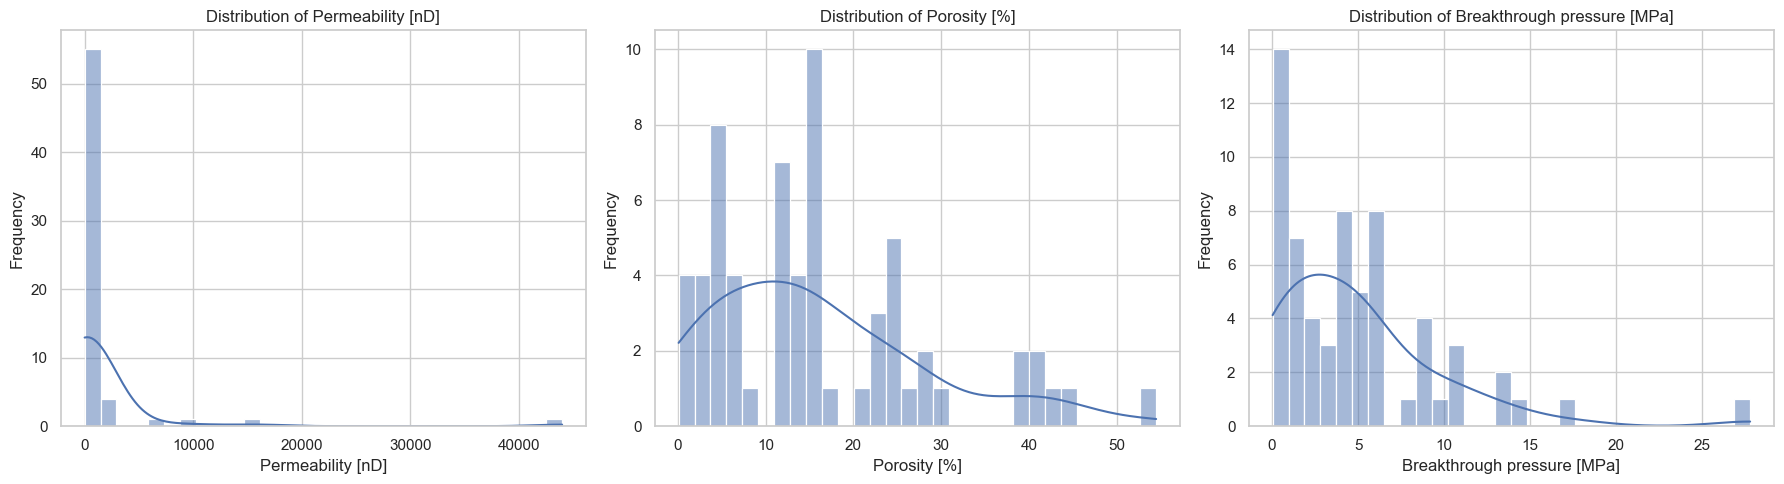

In [18]:
# Feature distribution: Direct - 2 Variables
feature_columns = ['Permeability [nD]', 
                   'Porosity [%]', 'Breakthrough pressure [MPa]']

num_features = len(feature_columns)
num_rows = (num_features + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(feature_columns):
    sns.histplot(df1[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

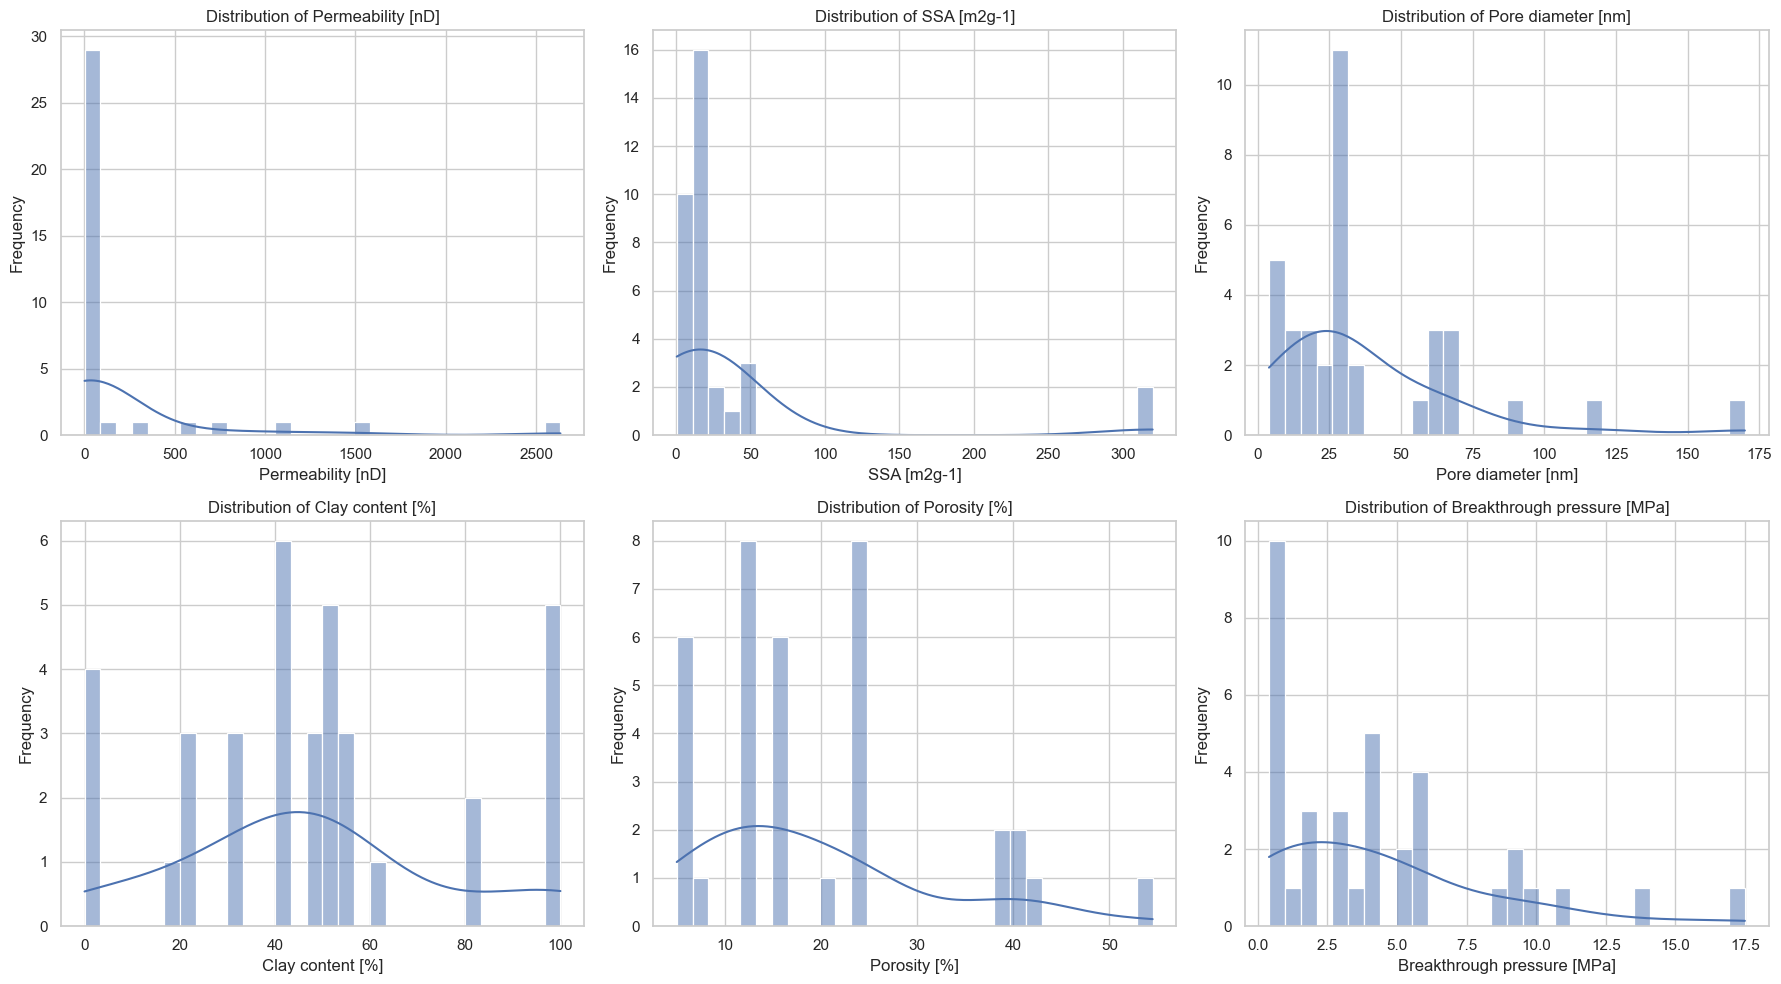

In [19]:
# Feature distribution: Direct - 5 Variables
feature_columns = ['Permeability [nD]', 'SSA [m2g-1]', 'Pore diameter [nm]', 'Clay content [%]',
                   'Porosity [%]', 'Breakthrough pressure [MPa]']

num_features = len(feature_columns)
num_rows = (num_features + 2) // 3  
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(feature_columns):
    sns.histplot(df2[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_41256/1621045284.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


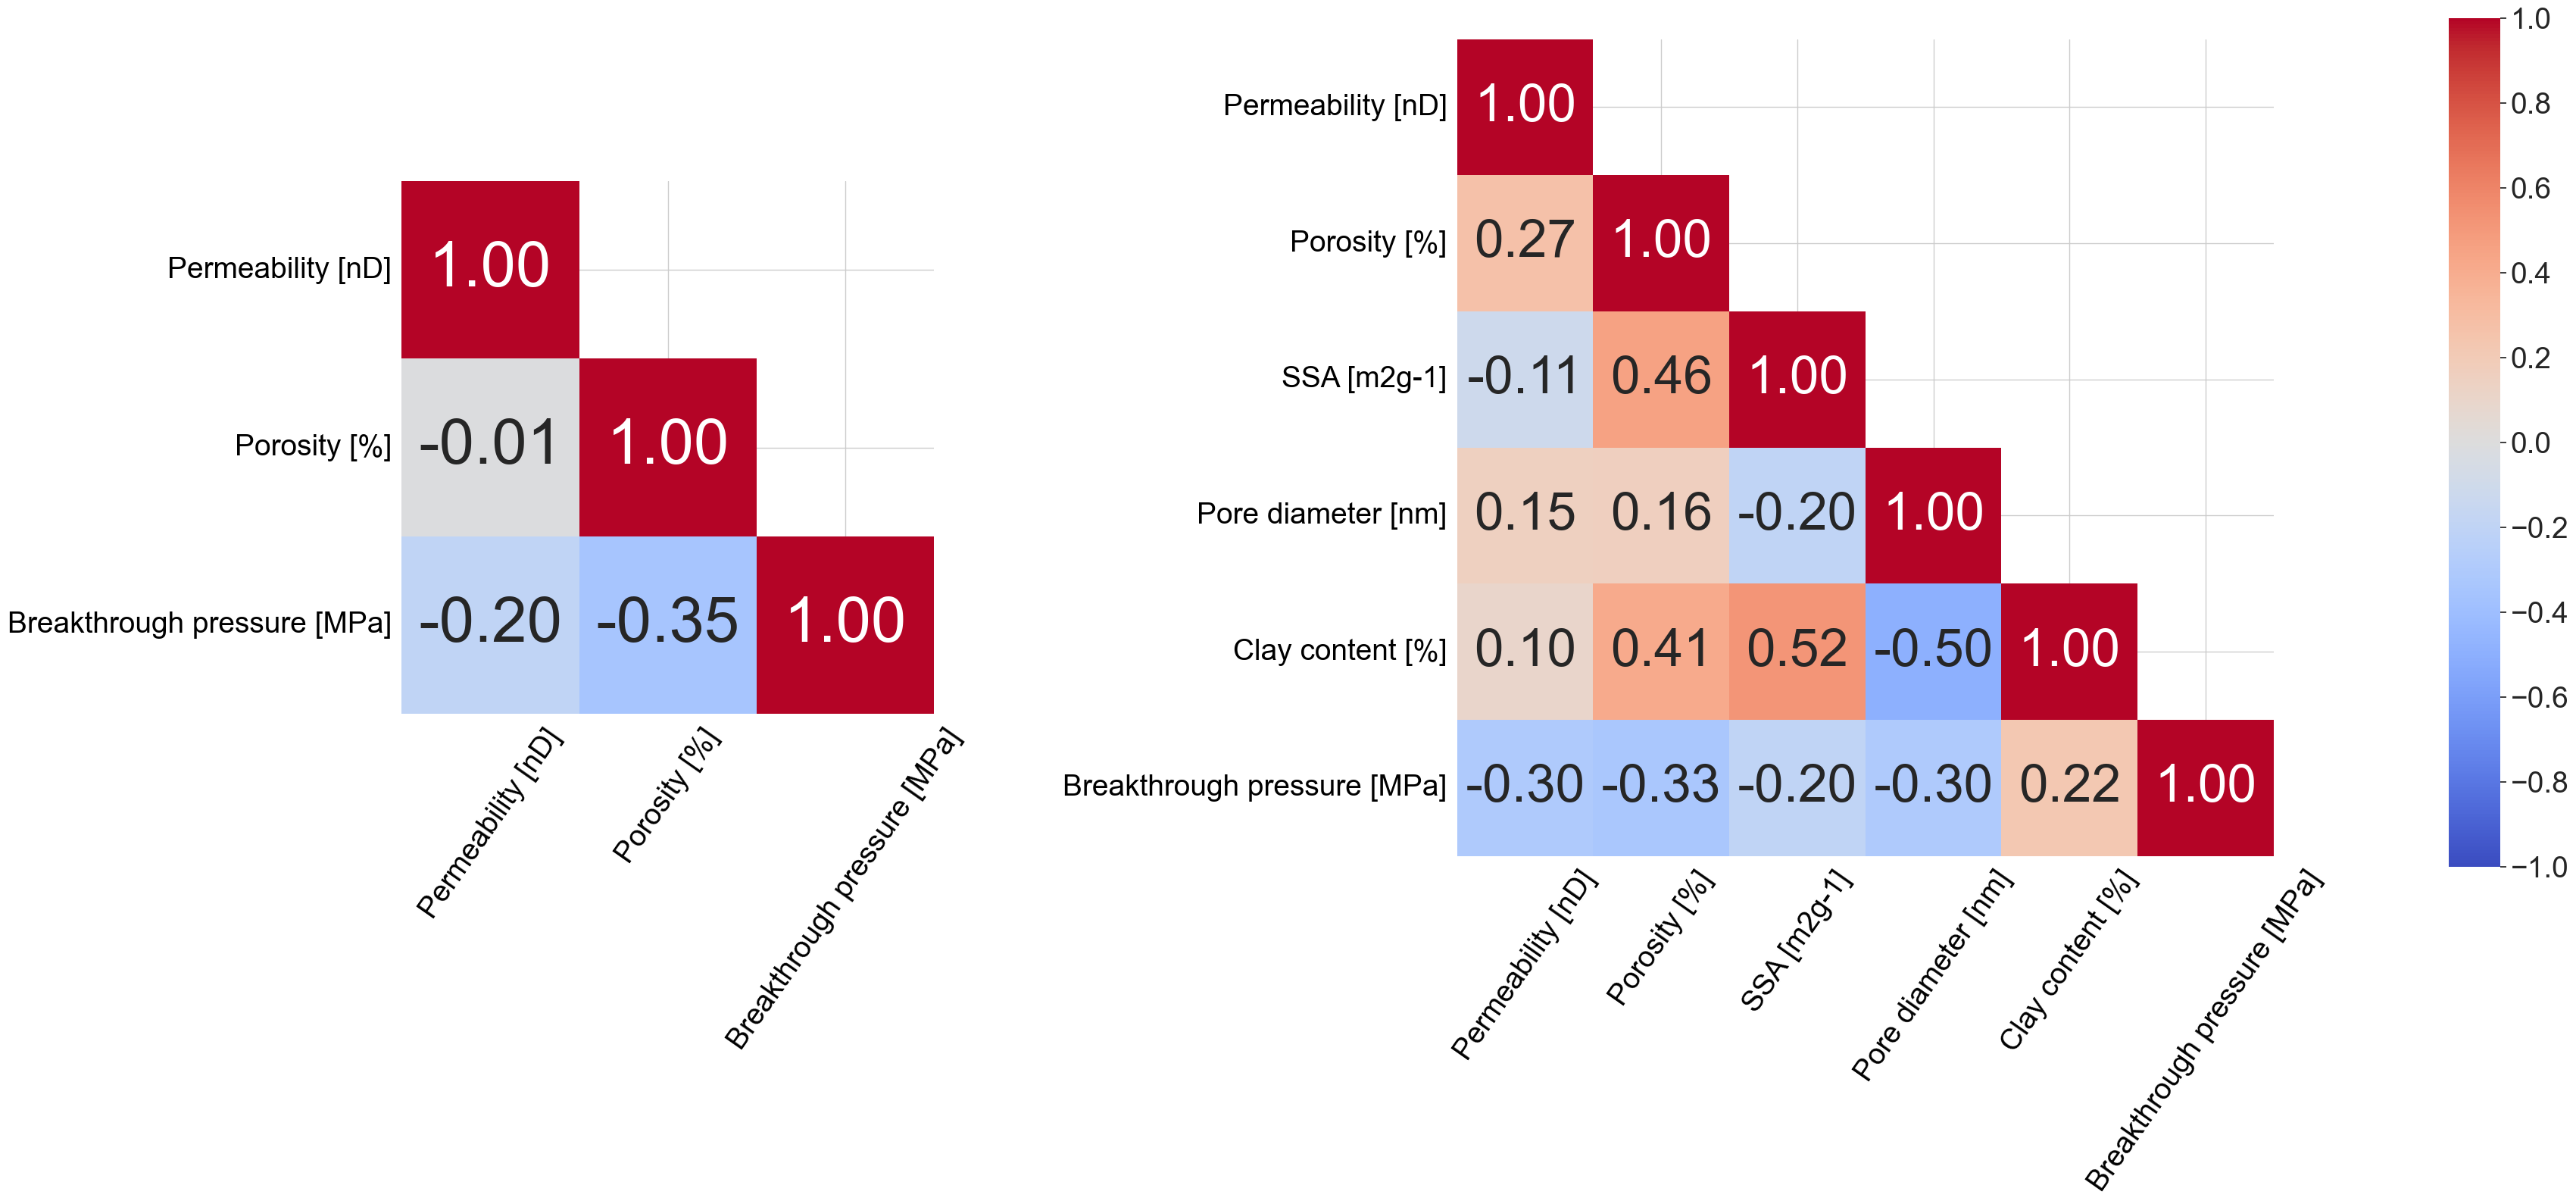

In [22]:
# Correlation Analysis: Direct Method
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

correlation_matrix_df = df1[['Permeability [nD]', 'Porosity [%]',
       'Breakthrough pressure [MPa]']].corr()
correlation_matrix_df1 = df2[['Permeability [nD]', 'Porosity [%]',
       'SSA [m2g-1]', 'Pore diameter [nm]', 'Clay content [%]',
       'Breakthrough pressure [MPa]']].corr()

mask_df = np.triu(np.ones_like(correlation_matrix_df, dtype=bool), k=1)
mask_df1 = np.triu(np.ones_like(correlation_matrix_df1, dtype=bool), k=1)

fig, axes = plt.subplots(1, 2, figsize=(34, 14), gridspec_kw={'width_ratios': [len(correlation_matrix_df.columns), len(correlation_matrix_df1.columns)], 'wspace': 0.5})

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])

sns.heatmap(correlation_matrix_df, annot=True, mask=mask_df, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 60}, ax=axes[0], cbar=False, square=True, vmin=-1, vmax=1)
axes[0].set_title('', fontsize=28, fontname='Arial')
axes[0].tick_params(axis='y', rotation=0, labelsize=28, labelcolor='black')
axes[0].tick_params(axis='x', labelsize=28, labelrotation=55, labelcolor='black')

sns.heatmap(correlation_matrix_df1, annot=True, mask=mask_df1, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 50}, ax=axes[1], cbar_ax=cbar_ax, square=True, vmin=-1, vmax=1,
            cbar_kws={'shrink': 1.0, 'ticks': [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]})
axes[1].set_title('', fontsize=28, fontname='Arial')
axes[1].tick_params(axis='y', rotation=0, labelsize=28, labelcolor='black')
axes[1].tick_params(axis='x', labelsize=28, labelrotation=55, labelcolor='black')

cbar = axes[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.subplots_adjust(wspace=0.5)

plt.show()

/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_41256/1542537440.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


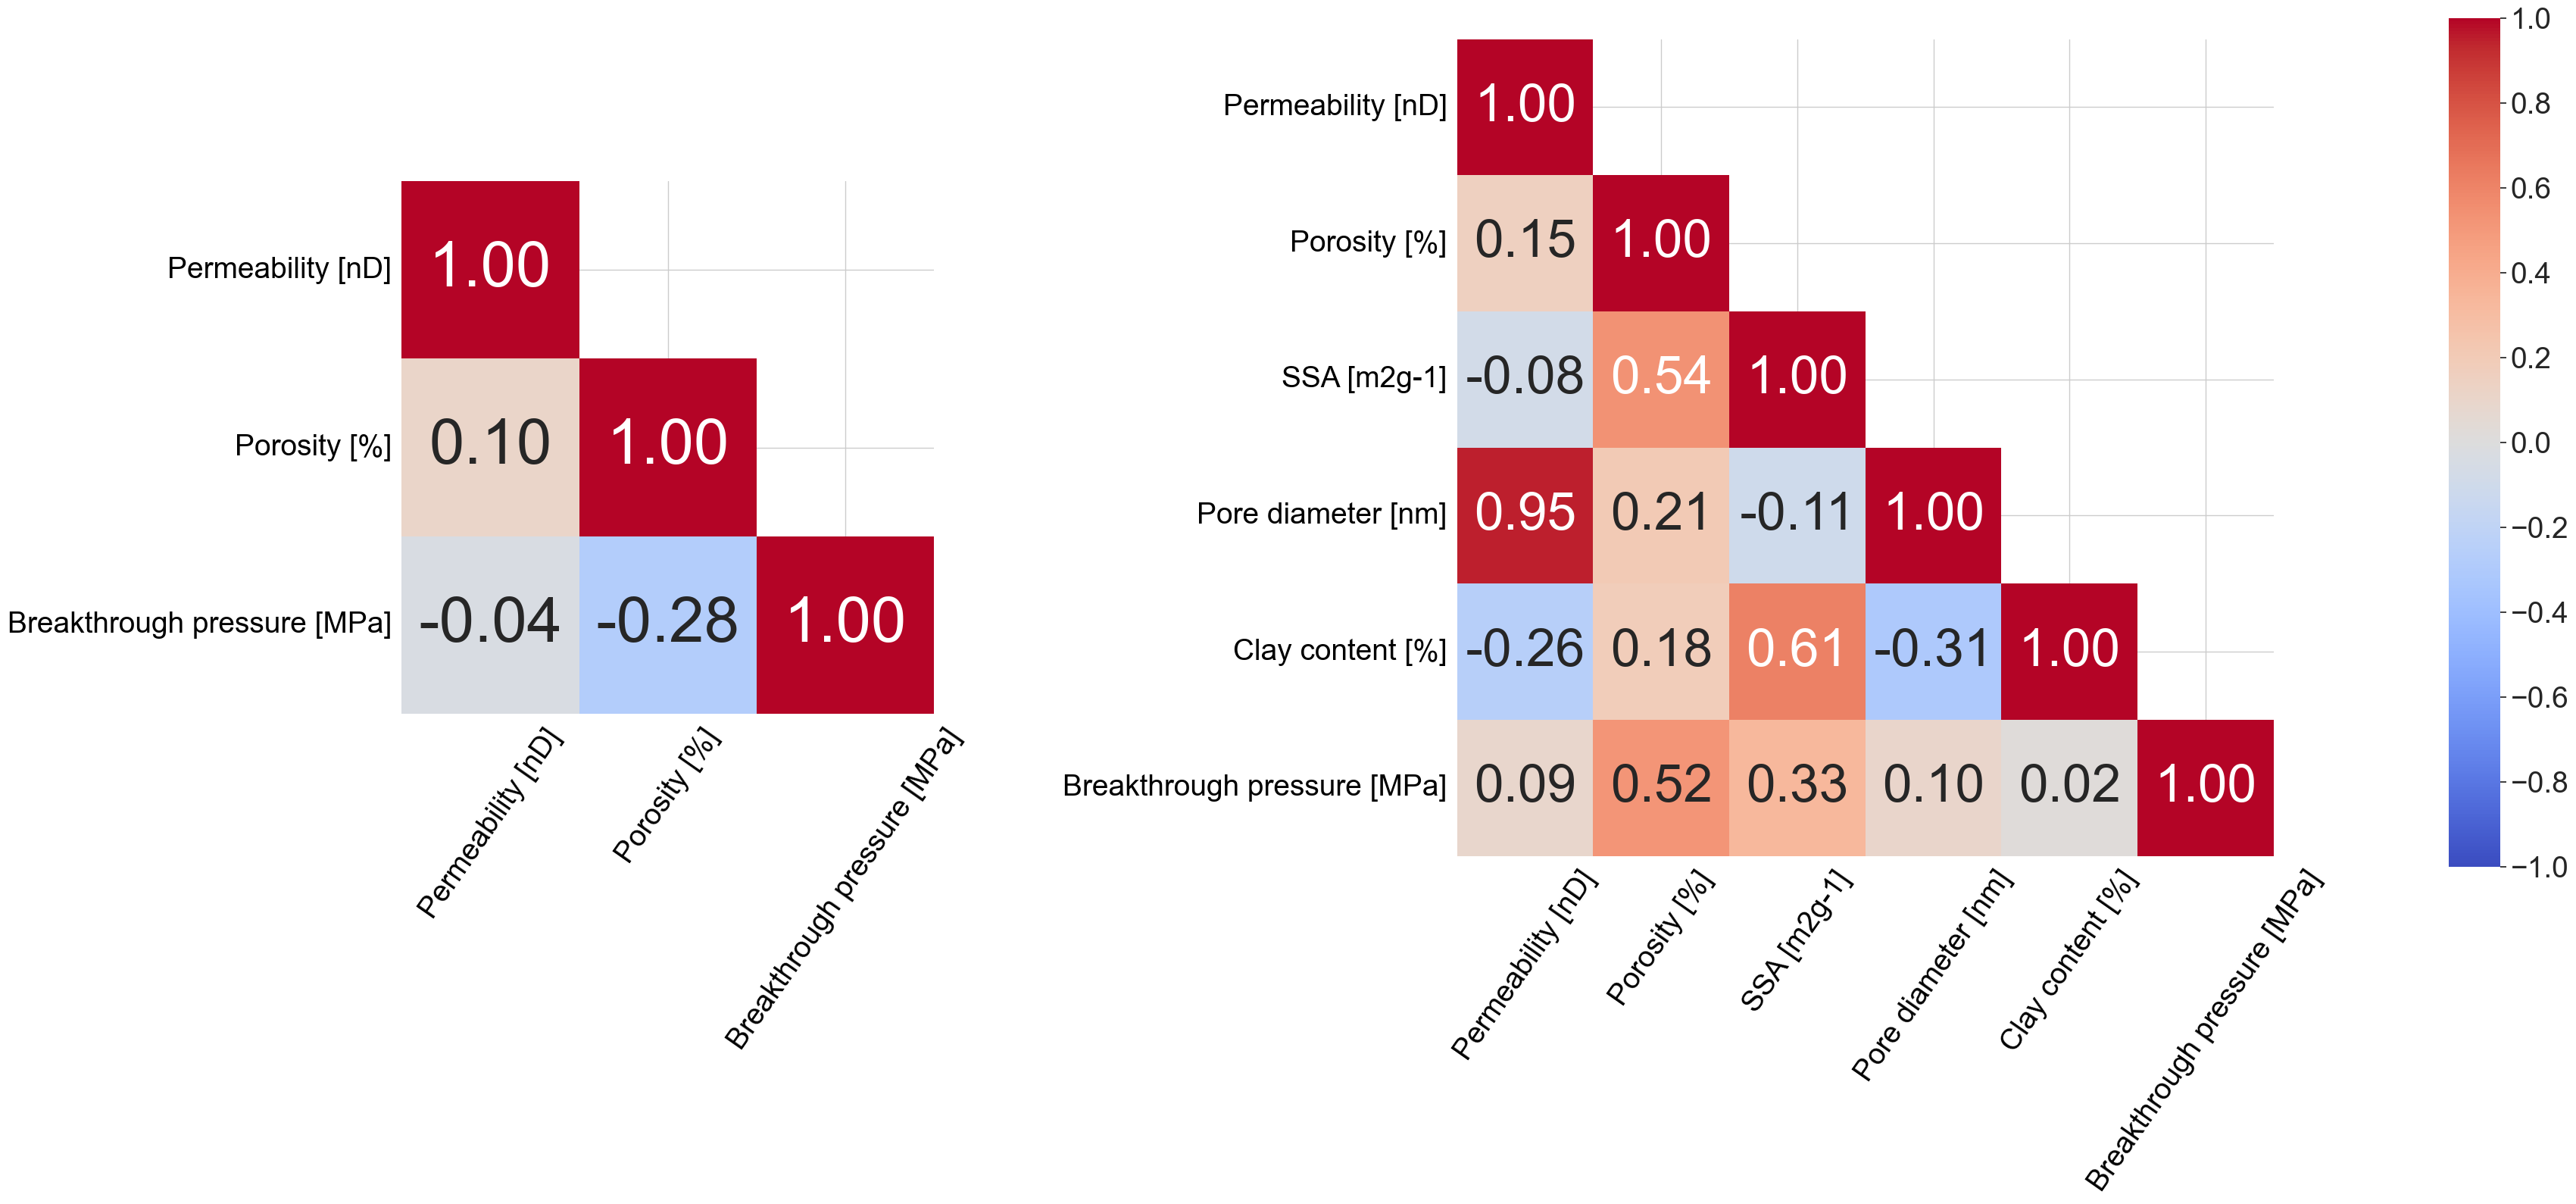

In [28]:
# Correlation Analysis: Indirect Method
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

correlation_matrix_df = df3[['Permeability [nD]', 'Porosity [%]',
       'Breakthrough pressure [MPa]']].corr()
correlation_matrix_df1 = df4[['Permeability [nD]', 'Porosity [%]',
       'SSA [m2g-1]', 'Pore diameter [nm]', 'Clay content [%]',
       'Breakthrough pressure [MPa]']].corr()

mask_df = np.triu(np.ones_like(correlation_matrix_df, dtype=bool), k=1)
mask_df1 = np.triu(np.ones_like(correlation_matrix_df1, dtype=bool), k=1)

fig, axes = plt.subplots(1, 2, figsize=(34, 14), gridspec_kw={'width_ratios': [len(correlation_matrix_df.columns), len(correlation_matrix_df1.columns)], 'wspace': 0.5})

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])

sns.heatmap(correlation_matrix_df, annot=True, mask=mask_df, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 60}, ax=axes[0], cbar=False, square=True, vmin=-1, vmax=1)
axes[0].set_title('', fontsize=28, fontname='Arial')
axes[0].tick_params(axis='y', rotation=0, labelsize=28, labelcolor='black')
axes[0].tick_params(axis='x', labelsize=28, labelrotation=55, labelcolor='black')

sns.heatmap(correlation_matrix_df1, annot=True, mask=mask_df1, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 50}, ax=axes[1], cbar_ax=cbar_ax, square=True, vmin=-1, vmax=1,
            cbar_kws={'shrink': 1.0, 'ticks': [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]})
axes[1].set_title('', fontsize=28, fontname='Arial')
axes[1].tick_params(axis='y', rotation=0, labelsize=28, labelcolor='black')
axes[1].tick_params(axis='x', labelsize=28, labelrotation=55, labelcolor='black')

cbar = axes[1].collections[0].colorbar
cbar.ax.tick_params(labelsize=28)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.subplots_adjust(wspace=0.5)

plt.show()